In [23]:
import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from pandas import read_excel
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, completeness_score 
from sklearn.metrics import v_measure_score, adjusted_rand_score
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial import ConvexHull

In [53]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")

labels = list(origin["Species"].map({"setosa":0, "versicolor":1, "virginica":2}))
x = origin.drop('Species', axis=1)
y = origin['Species']

scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [54]:
n = 4
kmeans = KMeans(n_clusters=n, random_state=777)
clusters = kmeans.fit_predict(std_x)

print("homogeneity_score:", homogeneity_score(labels, clusters))
print("completeness_score:", completeness_score(labels, clusters))
print("v_measure_score:", v_measure_score(labels, clusters))
print("adjusted_rand_score:", adjusted_rand_score(labels, clusters))
print("silhouette_score:", silhouette_score(std_x, clusters))

homogeneity_score: 0.6846652886216543
completeness_score: 0.5651523163727226
v_measure_score: 0.6191946284934392
adjusted_rand_score: 0.5586288082925156
silhouette_score: 0.41889233981710045


c:\Users\leekh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


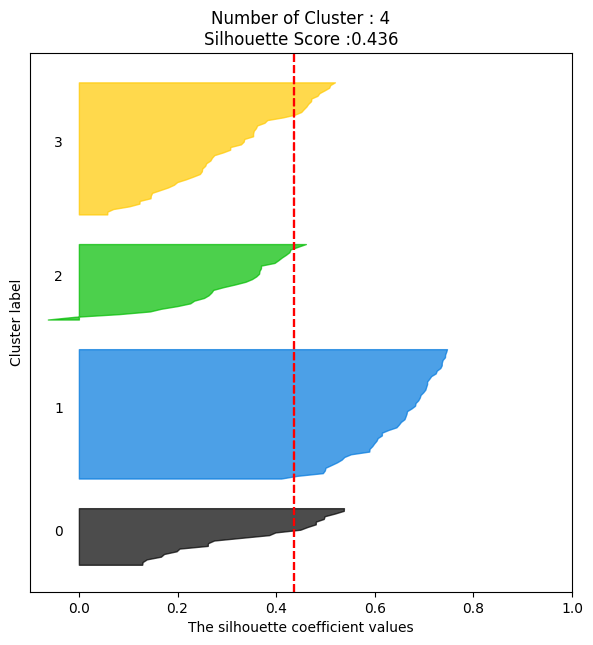

In [55]:
plt.figure(figsize=(7, 7))
sil_avg = silhouette_score(x, clusters)
sil_values = silhouette_samples(std_x, clusters)
        
plt.title('Number of Cluster : '+ str(n)+'\n' \
            'Silhouette Score :' + str(round(sil_avg,3)) )

plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.xlim([-0.1, 1])
plt.ylim([0, len(std_x) + (n + 1) * 10])
plt.yticks([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
y_lower = 10
for i in range(n):
    ith_cluster_sil_values = sil_values[clusters==i]
    ith_cluster_sil_values.sort()
            
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i
            
    color = cm.nipy_spectral(float(i) / n)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
            
    plt.axvline(x=sil_avg, color="red", linestyle="--")
        
plt.show()
plt.close()

In [56]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.42151732, -1.42945216,  0.03937284, -0.05297198],
       [-1.00206653,  0.90625492, -1.30310821, -1.25634413],
       [ 1.39733017,  0.23316022,  1.16062026,  1.21734049],
       [ 0.35704132, -0.39440379,  0.58656225,  0.54846743]])

In [60]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 2, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2,
       2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

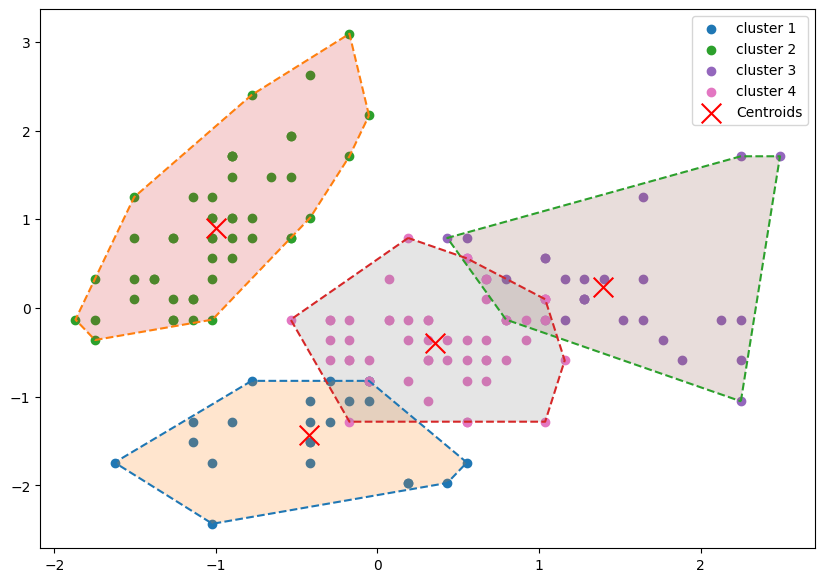

In [70]:
plt.figure(figsize=(10, 7))
tmp_x = std_x[:,:2]
for i in range(n):
    points = tmp_x[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'cluster {i+1}')

    hull = ConvexHull(points)
    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    plt.plot(points[vert, 0], points[vert, 1], '--', )
    plt.fill(points[vert, 0], points[vert, 1], alpha=0.2)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')

plt.legend()
plt.show()
plt.close()